$$
\chi^2_{n-1}=\frac{(n-1)S^2}{\sigma^2}
\quad\Rightarrow\quad
\frac{\chi^2_{n-1}}{n-1}=\frac{S^2}{\sigma^2}
$$

$$
F_{d_1,d_2}:=\frac{\frac{\chi^2_{d_1}}{d_1}}{\frac{\chi^2_{d_2}}{d_2}}=\frac{\frac{S_1^2}{\sigma_1^2}}{\frac{S_2^2}{\sigma_2^2}}=\frac{S_1^2}{S_2^2}\quad\mbox{if $\sigma_1=\sigma_2$}
$$

$$
H_0:\sigma_1=\sigma_2\quad \mbox{vs}\quad H_1: \sigma_1\neq\sigma_2
$$
$$$$
$$
H_0:\sigma_1=\sigma_2\quad \mbox{vs}\quad H_1: \sigma_1>\sigma_2
$$
$$$$
$$
H_0:\sigma_1=\sigma_2\quad \mbox{vs}\quad H_1: \sigma_1<\sigma_2
$$

In [4]:
# two-tail test
import numpy as np
import scipy.stats as stats

a = [1, 2, 1, 2, 1, 2, 5, 2, 1, 2]
b = [1, 3, -1, 2, 1, 5, -1, 6, -1, 2]

S_square_a = np.var(a, ddof=1)
S_square_b = np.var(b, ddof=1)

f_statistic = S_square_a / S_square_b 
F = stats.f(len(a)-1, len(b)-1) 
p_value = 2*min(F.cdf(f_statistic), F.sf(f_statistic))
f_statistic_ = F.ppf(1-(p_value/2))
print(f_statistic, f_statistic_, p_value)

0.2384473197781886 4.193798449612402 0.04406725028791889


In [5]:
# one-tail test
# critical region is on left
import numpy as np
import scipy.stats as stats

a = [1, 2, 1, 2, 1, 2, 5, 2, 1, 2]
b = [1, 3, -1, 2, 1, 5, -1, 6, -1, 2]

S_square_a = np.var(a, ddof=1)
S_square_b = np.var(b, ddof=1)

f_statistic = S_square_a / S_square_b 
F = stats.f(len(a)-1, len(b)-1) 
p_value = F.cdf(f_statistic)
print(f_statistic, p_value)

0.2384473197781886 0.022033625143959446


In [6]:
# one-tail test
# critical region is on right
import numpy as np
import scipy.stats as stats

a = [1, 2, 1, 2, 1, 2, 5, 2, 1, 2]
b = [1, 3, -1, 2, 1, 5, -1, 6, -1, 2]

S_square_a = np.var(a, ddof=1)
S_square_b = np.var(b, ddof=1)

f_statistic = S_square_a / S_square_b 
F = stats.f(len(a)-1, len(b)-1) 
p_value = F.sf(f_statistic)
print(f_statistic, p_value)

0.2384473197781886 0.9779663748560405


In [22]:
# Levene's test
import numpy as np
import scipy.stats as stats

a = [1, 2, 1, 2, 1, 2, 5, 2, 1, 2]
b = [1, 3, -1, 2, 1, 5, -1, 6, -1, 2]

f_statistic, p_value = stats.levene(a, b)
print(f_statistic, p_value)

4.890566037735849 0.040179382091355416


0.2384473197781886 4.193798449612402 0.04406725028791889


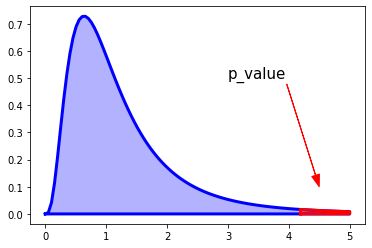

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

a = [1, 2, 1, 2, 1, 2, 5, 2, 1, 2]
b = [1, 3, -1, 2, 1, 5, -1, 6, -1, 2]

S_square_a = np.var(a, ddof=1)
S_square_b = np.var(b, ddof=1)

f_statistic = S_square_a / S_square_b 
F = stats.f(len(a)-1, len(b)-1) 
p_value = 2*min(F.cdf(f_statistic), F.sf(f_statistic))
f_statistic_ = F.ppf(1-(p_value/2))
print(f_statistic, f_statistic_, p_value)

fig, ax = plt.subplots()

x = np.linspace(0, 5, 100) 
y = F.pdf(x)
x = np.concatenate([[0], x, [5], [0]])
y = np.concatenate([[0], y, [0], [0]])
ax.fill(x, y, color='b', alpha=0.3)
ax.plot(x, y, color='b', linewidth=3)

# x = np.linspace(0, f_statistic)
# y = F.pdf(x) 
# x = np.concatenate([[0], x, [f_statistic], [0]])
# y = np.concatenate([[0], y, [0], [0]])
# ax.fill(x, y, color='r', alpha=0.3)
# ax.plot(x, y, color='r', linewidth=3)

x = np.linspace(f_statistic_, 5, 100)
y = F.pdf(x) 
x = np.concatenate([[f_statistic_], x, [5], [f_statistic_]])
y = np.concatenate([[0], y, [0], [0]])
ax.fill(x, y, color='r', alpha=0.3)
ax.plot(x, y, color='r', linewidth=3)

# xy = (f_statistic*2, 0.1)
# xytext = (3, 0.5)
# arrowprops = dict(color='r', width=0.2, headwidth=8)
# ax.annotate('p_value', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops)

xy = (4.5, 0.1)
xytext = (3, 0.5)
arrowprops = dict(color='r', width=0.2, headwidth=8)
ax.annotate('p_value', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops)
        
plt.show()